In [1]:
from sklearn.datasets import make_moons
from tensorflow import keras # for building Neural Networks
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Sklearn
import sklearn # for model evaluation
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

data = make_moons(n_samples=10000, shuffle=True, noise=None, random_state=None)
print("Data Shape", data[0].shape)
X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.2, random_state=10)
model = Sequential(name="Make-Moons-Model") # Model
model.add(Input(shape=(X_train.shape[1],), name='Input-Layer'))
model.add(Dense(8, activation='relu', name='Hidden-Layer'))
model.add(Dense(1, activation='sigmoid', name='Output-Layer'))

##### Step 4 - Compile keras model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
history = model.fit(X_train, y_train, batch_size=10, epochs=5, verbose=1, validation_split=0.2, shuffle=True)

Data Shape (10000, 2)
Epoch 1/5
640/640 [==============================] - 3s 2ms/step - loss: 0.4669 - accuracy: 0.7941 - precision: 0.8841 - recall: 0.6760 - val_loss: 0.2931 - val_accuracy: 0.8750 - val_precision: 0.8618 - val_recall: 0.8860
Epoch 2/5
640/640 [==============================] - 1s 2ms/step - loss: 0.2618 - accuracy: 0.8817 - precision: 0.8894 - recall: 0.8713 - val_loss: 0.2479 - val_accuracy: 0.8856 - val_precision: 0.8719 - val_recall: 0.8976
Epoch 3/5
640/640 [==============================] - 1s 2ms/step - loss: 0.2383 - accuracy: 0.8923 - precision: 0.8947 - recall: 0.8889 - val_loss: 0.2358 - val_accuracy: 0.8894 - val_precision: 0.8775 - val_recall: 0.8988
Epoch 4/5
640/640 [==============================] - 1s 2ms/step - loss: 0.2314 - accuracy: 0.8959 - precision: 0.8985 - recall: 0.8923 - val_loss: 0.2326 - val_accuracy: 0.8919 - val_precision: 0.8762 - val_recall: 0.9065
Epoch 5/5
640/640 [==============================] - 1s 2ms/step - loss: 0.2274 - accu

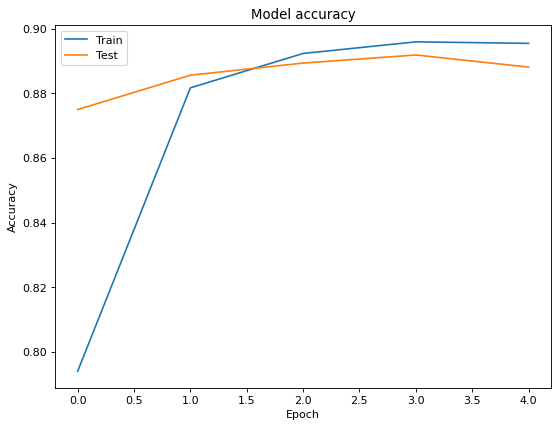

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

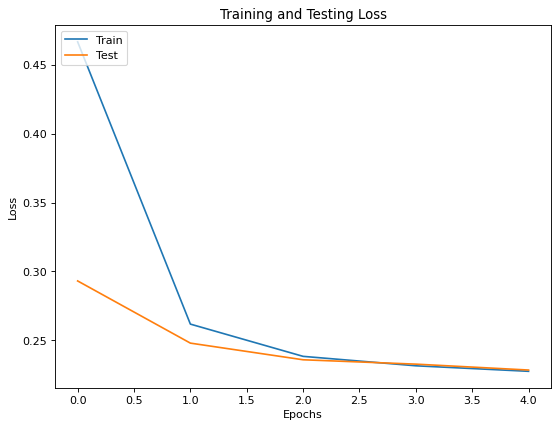

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [4]:
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    # create model
    model = Sequential(name="Model-with-All-Features")
    model.add(Input(shape=(X_train.shape[1],), name='Input-Layer'))
    model.add(Dense(8, activation='relu', name='Hidden-Layer'))
    model.add(Dense(1, activation='sigmoid', name='Output-Layer'))
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
    return model

import numpy
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=create_model, batch_size=10, epochs=10, validation_split=0.2, shuffle=True, class_weight={0 : 0.3, 1 : 0.70})
model._estimator_type = "classifier"
trained = model.fit(X_train,y_train)

Epoch 1/10
640/640 [==============================] - 2s 2ms/step - loss: 0.2030 - accuracy: 0.8023 - precision: 0.7546 - recall: 0.8951 - val_loss: 0.3707 - val_accuracy: 0.8456 - val_precision: 0.8014 - val_recall: 0.9091
Epoch 2/10
640/640 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.8611 - precision: 0.8353 - recall: 0.8989 - val_loss: 0.2990 - val_accuracy: 0.8687 - val_precision: 0.8324 - val_recall: 0.9155
Epoch 3/10
640/640 [==============================] - 1s 2ms/step - loss: 0.1153 - accuracy: 0.8809 - precision: 0.8519 - recall: 0.9217 - val_loss: 0.2757 - val_accuracy: 0.8819 - val_precision: 0.8442 - val_recall: 0.9296
Epoch 4/10
640/640 [==============================] - 1s 2ms/step - loss: 0.1065 - accuracy: 0.8820 - precision: 0.8467 - recall: 0.9324 - val_loss: 0.2691 - val_accuracy: 0.8813 - val_precision: 0.8369 - val_recall: 0.9398
Epoch 5/10
640/640 [==============================] - 1s 2ms/step - loss: 0.1022 - accuracy: 0.8852 - pr

C:\Users\Dee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


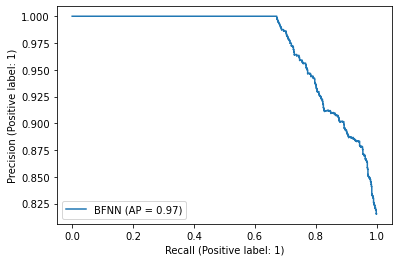

In [5]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model, X_test, y_test, name = 'BFNN')